# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools as it
from sklearn.linear_model import LinearRegression

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df_car = pd.read_csv("car_data.csv")

In [3]:
df_car.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df_mge_pr = df_car.iloc[:,:2]

In [5]:
df_mge_pr.shape

(804, 2)

In [6]:
df_mge_pr.isnull().sum()

Price      0
Mileage    0
dtype: int64

In [7]:
X_mileage = df_mge_pr[["Mileage"]] # independent
Y_price = df_mge_pr[["Price"]] # dependent

<AxesSubplot: xlabel='Mileage', ylabel='Price'>

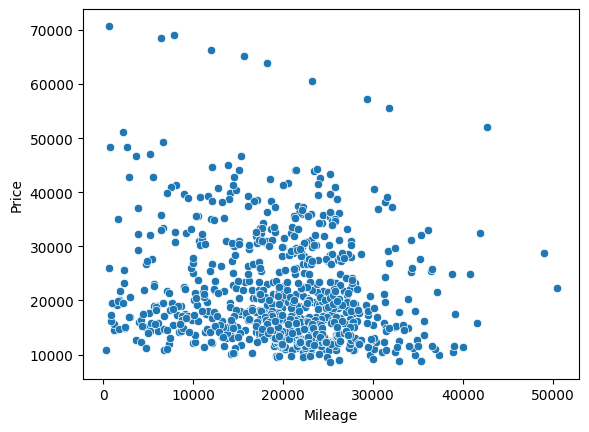

In [8]:
sns.scatterplot(data=df_mge_pr,x="Mileage",y="Price")

In [9]:
ml_pr_lr = LinearRegression()
ml_pr_lr.fit(X_mileage,Y_price)

LinearRegression()

In [10]:
ml_pr_lr.predict([[32896]])

C:\Users\Thamizhiniyan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[19089.32454624]])

In [11]:
y_pred = ml_pr_lr.predict(X_mileage)

In [12]:
ml_pr_lr.score(X_mileage,Y_price)

0.02046344732348926

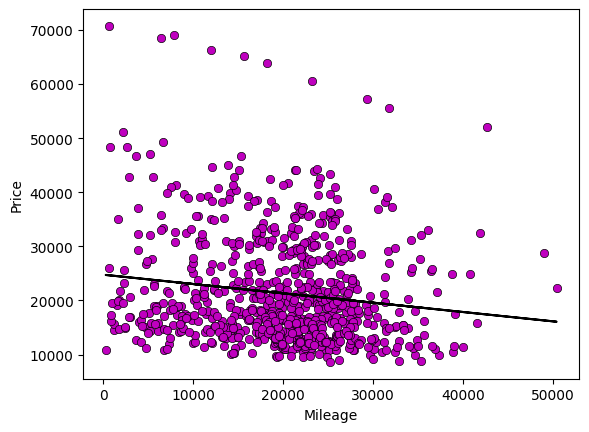

In [13]:
sns.scatterplot(data=df_mge_pr,x="Mileage",y="Price",color="m",edgecolor = "k")
plt.plot(df_mge_pr["Mileage"],y_pred,color="k")

## `conclusion` - Task 1

**R2 score is low and the correlation seems can be moved towards slightly negative**

## `Task 2`

In [14]:
df_car

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [15]:
columns_names =["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound","Leather"]

In [16]:
# input_cols = df_car[columns_names]
# focus_output = df_car["Price"]
# regr_pr = linear_model.LinearRegression()
# regr_pr.fit(input_cols, focus_output)
# regr_pr.score(input_cols, focus_output)

NameError: name 'linear_model' is not defined

In [21]:
X=df_car[columns_names]
X
y = df_car["Price"]
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [22]:
df_car_mileage = pd.concat([X,y],axis=1)

In [25]:
def lin_reg_wrt_focus(columns_names, df, focus='Price'):
    input_cols = df[columns_names]
    focus_output = df[focus]
    regr_pr = LinearRegression()
    regr_pr.fit(input_cols, focus_output)
    return regr_pr.score(input_cols, focus_output)

In [26]:
lin_reg_wrt_focus(columns_names, df_car_mileage)

0.4462643536728381

In [27]:
df_car_mileage = pd.concat([X,y],axis=1)

In [28]:
def get_combinations(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]
combinations = get_combinations(columns_names)


In [29]:
def all_combo_scores(combinations, df, focus='Price'):
    combo_scores = {}
    for m in range(len(list(combinations))):
        for n in list(combinations[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores


In [30]:
combo_scores = all_combo_scores(combinations, df_car_mileage)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.4462643536728381,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237245, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475605,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252684, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809262,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4257681327974421, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267834,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42441824017998764,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510405, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398467, ('Mileage', 'Cylinder', 'Liter', 'Cruise

**R2 score low with other combinations**

max value with `'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'` even this combination r2 score is low


In [31]:
df_car

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.

2.Find the best combination of factors to predict price. 

In [32]:
df_car["Type"].nunique()

5

In [33]:
df_car["Model"].nunique()

32

In [34]:
df_car["Make"].nunique()

6

In [35]:
df_car[["Make","Model","Type"]]

,Make,Model,Type
0,Buick,Century,Sedan
1,Buick,Century,Sedan
2,Buick,Century,Sedan
3,Buick,Century,Sedan
4,Buick,Century,Sedan
...,...,...,...
799,Saturn,L Series,Sedan
800,Saturn,L Series,Sedan
801,Saturn,L Series,Sedan
802,Saturn,L Series,Sedan


In [36]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(sparse_output= False,drop="first",handle_unknown="ignore")
onehot_encoded=pd.DataFrame(encode.fit_transform(df_car[["Make","Model","Type"]]),columns = encode.get_feature_names_out())

In [37]:
encode.get_feature_names_out()

array(['Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB',
       'Make_Saturn', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5',
       'Model_9_5 HO', 'Model_AVEO', 'Model_Bonneville', 'Model_CST-V',
       'Model_CTS', 'Model_Cavalier', 'Model_Century', 'Model_Classic',
       'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6',
       'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix', 'Model_Impala',
       'Model_Ion', 'Model_L Series', 'Model_Lacrosse', 'Model_Lesabre',
       'Model_Malibu', 'Model_Monte Carlo', 'Model_Park Avenue',
       'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire', 'Model_Vibe',
       'Model_XLR-V8', 'Type_Coupe', 'Type_Hatchback', 'Type_Sedan',
       'Type_Wagon'], dtype=object)

In [38]:
df_car1 = pd.concat([df_car.drop(["Trim","Make","Model","Type"],axis=1),onehot_encoded],axis=1)

In [39]:
df_car1

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,...,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17542.036083,9135,6,3.1,4,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16218.847862,13196,6,3.1,4,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16336.913140,16342,6,3.1,4,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,16339.170324,19832,6,3.1,4,1,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
800,16175.957604,19095,6,3.0,4,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
801,15731.132897,20484,6,3.0,4,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
802,15118.893228,25979,6,3.0,4,1,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
x_car = df_car1.drop("Price",axis=1)

In [41]:
y_car = df_car[["Price"]]

In [42]:
one_columns = list(df_car1.columns)


In [43]:
model = LinearRegression()   
model.fit(x_car.values,y_car.values)
model.score(x_car.values,y_car.values)

0.9804768702447504

In [44]:
model.score(x_car.values,y_car.values)

0.9804768702447504

`Conclusion` :

**score of r2 is 0.9804**

In [47]:
def m_s(col_name, df, focus='Price'):
    input_cols = df[col_name]
    focus_output = df[focus]
    m1 = LinearRegression()
    m1.fit(input_cols, focus_output)
    return m1.score(input_cols, focus_output)

In [48]:
m_s(one_columns,df_car1)

1.0

In [49]:
combi = get_combinations(one_columns)

In [50]:
def all_combo_score(combinations, df, focus='Price'):
    combo_scores = {}
    for m in range(len(list(combinations))):
        for n in list(combinations[m]):
            combo_scores[m_s(list(n), df, focus)] = n
    return combo_scores

In [ ]:
combi_score = all_combo_score(combi,df_car1)

In [ ]:
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)